# Usage of dynamic_programming + knapsack_greedy

In [ ]:
from src.dynamic import dynamic_programming
from src.greedy import knapsack_greedy
from utils.reader import load_test_cases
import time

data_directory = "data/instances"
test_cases = load_test_cases(data_directory)
tested = 20

if(tested == 0):
    test_cases = test_cases
else:
    test_cases = test_cases[0:tested]


results = []
# ler apenas o primeiro arquivo
for i, test_case in enumerate(test_cases):
    values = test_case["values"]
    weights = test_case["weights"]
    capacity = test_case["capacity"]

    start_time_dynamic = time.time()  
    [max_value_dynamic, selected_items_dynamic] = dynamic_programming(values, weights, capacity)
    end_time_dynamic = time.time() 

    start_time_greedy = time.time()
    [max_value_greedy, selected_items_greedy] = knapsack_greedy(values, weights, capacity)
    end_time_greedy = time.time()
    
    print(f"Test Case {i + 1}:")
    print(f"Dynamic Programming: {max_value_dynamic}")
    print(f"Greedy: {max_value_greedy}")
    print()
    results.append({
        "Test-Case": i + 1,
        "Capacity": capacity,
        "Dynamic-Programming": max_value_dynamic,
        "Greedy": max_value_greedy,
        "Time-Dynamic": end_time_dynamic - start_time_dynamic,
        "Time-Greedy": end_time_greedy - start_time_greedy,
        "BestFit": max_value_dynamic if max_value_dynamic > max_value_greedy else max_value_greedy,
        "BestTime": "Dynamic" if end_time_dynamic - start_time_dynamic < end_time_greedy - start_time_greedy else "Greedy"
    })


# Save the data processed in CSV

In [ ]:
import csv
csv_filename = "data/results/comparation.csv"

with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ["Test-Case", "Capacity", "Dynamic-Programming", "Greedy", "Time-Dynamic", "Time-Greedy", "BestFit", "BestTime"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerows(results)

# Plot the data

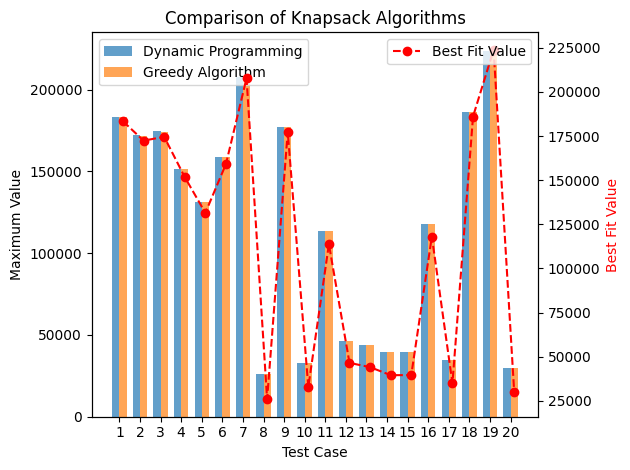

In [45]:
import matplotlib.pyplot as plt
import numpy as np

test_case_numbers = [result["Test-Case"] for result in results]
dynamic_values = [result["Dynamic-Programming"] for result in results]
greedy_values = [result["Greedy"] for result in results]
best_fit_values = [result["BestFit"] for result in results]
best_time_labels = [result["BestTime"] for result in results]

width = 0.35
x = np.arange(len(test_case_numbers))
fig, ax1 = plt.subplots()

dynamic_bars = ax1.bar(x - width/2, dynamic_values, width, label='Dynamic Programming', alpha=0.7)
greedy_bars = ax1.bar(x + width/2, greedy_values, width, label='Greedy Algorithm', alpha=0.7)

ax1.set_xlabel('Test Case')
ax1.set_ylabel('Maximum Value')
ax1.set_title('Comparison of Knapsack Algorithms')
ax1.set_xticks(x)
ax1.set_xticklabels(test_case_numbers)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x + width/2, best_fit_values, linestyle='--', marker='o', color='red', label='Best Fit Value')
ax2.set_ylabel('Best Fit Value', color='red')
ax2.legend(loc='upper right')



plt.tight_layout()
plt.show()
